Python for Data & Analytics - 2nd Edition<br>
Chapter 17, section 2

*** requires datafile: sales.csv

In [1]:
import pandas as pd
sales = pd.read_csv('sales.csv', parse_dates=['time'])

In [2]:
sales.head()

,time,product,region,count
0,2021-01-01 01:28:26,110,N,1
1,2021-01-01 04:22:06,110,N,3
2,2021-01-01 06:21:05,110,N,1
3,2021-01-01 09:10:33,110,N,2
4,2021-01-01 10:39:22,110,N,0


In [3]:
sales.pivot_table(values='count', index='product', aggfunc='sum')

,count
product,
110,4801
120,3305
130,2958
140,2058


In [4]:
pd.set_option('display.precision', 1)
pivot = sales.pivot_table(values='count', index='product', aggfunc='mean')
pivot.columns = ['Avg # per Transaction']
pivot

,Avg # per Transaction
product,
110,1.0
120,2.2
130,2.0
140,1.4


In [5]:
sales['quarter'] = sales['time'].dt.to_period('Q')
sales.head()

,time,product,region,count,quarter
0,2021-01-01 01:28:26,110,N,1,2021Q1
1,2021-01-01 04:22:06,110,N,3,2021Q1
2,2021-01-01 06:21:05,110,N,1,2021Q1
3,2021-01-01 09:10:33,110,N,2,2021Q1
4,2021-01-01 10:39:22,110,N,0,2021Q1


In [6]:
sales.pivot_table(values='count', columns='quarter', aggfunc='sum')

quarter,2021Q1,2021Q2,2021Q3,2021Q4
count,3326,3240,3400,3156


In [7]:
sales.pivot_table(values='count', index='product', columns='quarter',
                  aggfunc='sum')

quarter,2021Q1,2021Q2,2021Q3,2021Q4
product,,,,
110,1357,1293,1173,978
120,824,801,833,847
130,727,690,830,711
140,418,456,564,620


<AxesSubplot:xlabel='product'>

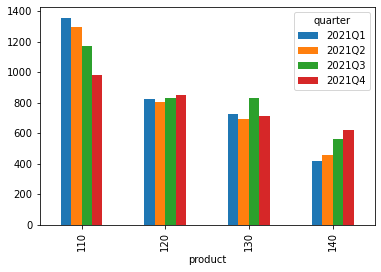

In [8]:
%matplotlib inline
pivot = sales.pivot_table(values='count', index='product', columns='quarter',
                          aggfunc='sum')
pivot.plot(kind='bar')

In [9]:
sales.pivot_table(values='count', index=['region','product'],
                  columns='quarter', aggfunc='sum', margins=True)

quarter         2021Q1  2021Q2  2021Q3  2021Q4    All
region product                                       
E      110         183     167     132     189    671
       120         190     211     195     193    789
       130         180     200     210     191    781
       140          81     107     169     181    538
N      110         817     726     695     532   2770
       120         236     237     293     345   1111
       130         195     163     241     191    790
       140         127     104     146     164    541
S      110         176     231     166     127    700
       120         174     206     133     120    633
       130         177     175     216     151    719
       140         105     131     119     123    478
W      110         181     169     180     130    660
       120         224     147     212     189    772
       130         175     152     163     178    668
       140         105     114     130     152    501
All               3326    3240    3400    3156  13122

Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC